# Week 1: Introduction to Python (Part 3)

This is the third part of the Introduction to Python for Natural Language Engineering module.  
These notebooks are designed to give you the working knowledge of Python necessary to complete the lab sessions for Natural Language Engineering. 

From the first 2 notebooks you should be familiar with a range of data types including strings, lists, sets, tuples and dictionaries.  You should also be familiar with defining your own functions as well as a number of built-in functions including print(), type(), range() and zip().  This notebook will introduce a number of more complex features including classes, list comprehensions, map(), lazy generators and running python programs in other environments.  It will also introduce a useful Python library for data analysis - Pandas.

Some extension material could be left until later in the term if you do not have time to tackle it now.

As in the last session:-

- Run all of the code cells as you work through the notebook. 
- Try to understand what is happening in each code cell and predict the output before running it.
- Complete all of the exercises.
- Discuss answers and ask questions!


## Classes

Anyone who has previously programmed in Java will be familiar with the concept of objects.  A Python class  is a complex type whichallows the encapsulation of attributes and methods.  You have already been using a number of Python classes (e.g., strings, lists, dictionaries).  However, sometimes it is useful to be able to define new classes.

In [2]:
class Student:
    passmark=50  #this is a class variable which will be shared by all instances of Student
    
    def __init__(self,name,mark):  
        """
        initialisation method run when a new instance is created
        in general it can take any number of arguments (in addition to self)
        :param self: this instance, name: name of Student, mark: mark of Student
        """
        self.name=name  #store the name in an instance variable called name
        self.mark=mark  #store the mark in an instance variable called mark
        
    def passes(self):
        """
        has this student passed the course?
        check whether the mark associated with this instance is greater than the class variable Passmark
        :param self: this instance
        :returns boolean
        """
        return self.mark > Student.passmark

In [ ]:
Student

In [ ]:
type(Student)

Creating an instance of a class (remember every class defines a type).

In [ ]:
student1 = Student("Jack",40)

In [ ]:
student1

In [ ]:
type(student1)

In [ ]:
student1.passes()

### Exercise 1a
Create a new student whose name is "Jill" and whose mark is 60.


In [3]:
Jill = Student("Jill", 60)

### Exercise 1b
Write some code which takes a list of Student objects and returns a list of the names of students who failed

In [13]:
def whoFailed(students):
    failedStudents = []
    for student in students:
        if not student.passes(): failedStudents.append(student.name)
    return failedStudents

## The map function
This takes a function and an iterable (e.g. a list) as arguments. It then applies the function to every item of the iterable, returning a list of the results.

In [ ]:
#First we make a function, which we will pass to the map function in the next cell
natural_numbers = range(5)
def square(n):
    return n**2

square(5)

In [ ]:
squared_numbers = map(square, natural_numbers)
for i in squared_numbers:
    print (i)

In [15]:
def decorate(char):
     return "*" + char + "*"

decorate("A")

'*A*'

In [ ]:
decorated_characters = map(decorate, "Hello")
type(decorated_characters)

In [16]:
decorated_characters = map(decorate, "Hello")
for char in (decorated_characters):
     print (char)

*H*
*e*
*l*
*l*
*o*


### Exercise 2a
In the blank cell below write a function called `add_exclamation` which adds a `'!'` to the input string. Then map add_exclamation to print each word in `opening_line`, followed by an exclamation point.

In [17]:
def add_exclamation(s):
    return s + "!"

In [18]:
opening_line="It was the best of times, it was the worst of times"

In [23]:
new = map(add_exclamation, opening_line.split())
print("".join(new))

It!was!the!best!of!times,!it!was!the!worst!of!times!


### Exercise 2b
In the next code cell we see code that determines the kinds of tokens found in a list. A token is a specific occurrence of a basic unit of lexical processing, typically a word or an item of punctuation.

- Study the programme, in particular the string methods. These are very useful in NLP.
- Experiment with the string methods using the empty cell until you understand how they work in special cases such as a single space and a single punctuation mark.
- The programme will only assign one feature to each token. Are there any cases where more than one feature should be assigned?

In [24]:
def make_tokens(input_text):
    """
    Take an input text, split it into tokens, find the
    token's shape, make a feature
    vector with the token itself and its shape, return
    a list of all token feature vectors found in the input.
    :param input_text: A character string containing spaces
    :return: A list of token feature vectors (token, shape).
        Sample output: [('a', 'alpha'), ('7', 'digit'), ('A27', 'alnum')]
    """
    
    # Here we define a token as being delimited by a whitespace:
    
    tokens = input_text.split()
    return map(make_token_feature_vector, tokens)


def make_token_feature_vector(token):
    """
    Given a token, extract its shape and return a
    vector with the token itself and its shape
    :param token: A character string
    :return: A tuple (token, shape)
    """
    
    if token.isalpha():
        return (token, "alpha")
    elif token.isdigit():
        return (token, "digit")
    elif token.isalnum():
        return (token, "alnum")
    elif token in ",:;":  
        return (token, "punctuation")
    elif token in ".!?":  
        return (token, "sentence_end")
    elif token == "\n":  
        return (token, "paragraph_end")
    else:
        return (token, "other")

input_file_path="sample_text.txt"
with open(input_file_path) as input_file:
    sample_text=input_file.read()
for token in make_tokens(sample_text):
    print(token)

('This', 'alpha')
('is', 'alpha')
('some', 'alpha')
('sample', 'alpha')
('text.', 'other')
('Feel', 'alpha')
('free', 'alpha')
('to', 'alpha')
('replace', 'alpha')
('it', 'alpha')
('with', 'alpha')
('something', 'alpha')
('more', 'alpha')
('interesting!', 'other')
('some', 'alpha')
('some', 'alpha')
('sample', 'alpha')


In [30]:
print(make_token_feature_vector("2a"))

('2a', 'alnum')


## List comprehension

List comprehensions are a *pythonic* way of reducing the number of lines of code in your programs - they are equivalent to a `for ... in` loop.  

If we want to create a list of the first 4 square numbers, we could use the following 3 lines:


In [ ]:
squares=[]
for x in range(4):
    squares.append(x**2)
squares

Alternatively, we could use the following list comprehension

In [ ]:
squares=[x**2 for x in range (4)]
squares

List comprehensions can be used to create a list of decorated characters.

In [ ]:
["*" + char + "*" for char in "Hello"]

The following function, `is_even` returns `True` for even numbers, and `False`, otherwise.

In [ ]:
#Remember the mod operator % returns the residue after integer division
def is_even(n):
    return not n % 2

In [ ]:
is_even(8)

In [ ]:
is_even(7)

List comprehensions can be used with our `is_even` function to create a list of squares for the first even numbers.

In [ ]:
[square(n) for n in range(15) if is_even(n)]

### Exercise 3a
In the blank cell below create a list of the odd numbers in the range 0-20.

In [32]:
[n for n in range(21) if n % 2 != 0]

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

### Exercise 3b
In the blank cell below create a list of numbers in the range 0-20 that are both odd AND divisible by 3.

In [33]:
[n for n in range(21) if n % 2 != 0 and n % 3 == 0]

[3, 9, 15]

## Pandas dataframes
We will be using tables in various ways later in the module. We now look at how to store tables as Pandas dataframes. 

If you want more details, a good starting point is [10 Minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html).

First, let's create some data to put in the table. This is meant to be the results of some experiment that we have underaken. 

To do this we create a list of tuples, where each tuple is a row in the table.
- We use `display` rather than `print` as it produces a nicer looking table.

Run the cell and make sure you understand the code.

In [3]:
import pandas as pd
results = [
    (10,0.674),
    (20,0.708),
    (30,0.721),
    (40,0.744),
    (50,0.748),
    (60,0.759),
    (70,0.762),
    (80,0.769),
    (90,0.773),
    (100,0.775)]
df = pd.DataFrame(results,columns = ["Sample Size","Accuracy"])
display(df)

,Sample Size,Accuracy
0,10,0.674
1,20,0.708
2,30,0.721
3,40,0.744
4,50,0.748
5,60,0.759
6,70,0.762
7,80,0.769
8,90,0.773
9,100,0.775


### Making a table from columns
We now create the same dataframe, but in a different way. This time we specify the contents by giving a list for each column.
- The column lists and `zip`'d together to create the same list of tuples we saw above, one tuple for each row of the table.
- `zip` returns an iterator of tuples, so  `list` is needed to give the required list of tuples.

In [35]:
sample_sizes = list(range(10,110,10))
scores = [0.674,0.708,0.721,0.744,0.748,0.759,0.762,0.769,0.773,0.775]
df = pd.DataFrame(list(zip(sample_sizes,scores)),columns = ["Sample Size","Score"])
display(df)

,Sample Size,Score
0,10,0.674
1,20,0.708
2,30,0.721
3,40,0.744
4,50,0.748
5,60,0.759
6,70,0.762
7,80,0.769
8,90,0.773
9,100,0.775


### Plotting data in a dataframe
In the following cell we see how to plot the dataframe containing our pretend experimental results.
- Note that some of the settings are determined by code in the first cell of the notebook.
- `x=0` indicates that the first column of the data provides the values on the x-axis.
- See [pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) for more details.

First, however, we need this bit of jupyter notebook 'magic code' (which isn't python and is identified by the `%` at the start of the line), to make sure that graphs and plots are produced in the notebook as output rather than in a separate window.

In [36]:
%matplotlib inline

(0.6, 0.8)

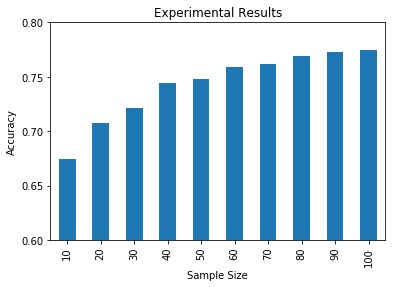

In [37]:
ax = df.plot(kind="bar",x=0,legend=False,title="Experimental Results",yticks=(0.6,0.65,0.7,0.75,0.8))
# set the x-axis label
ax.set_xlabel("Sample Size")
# set the y-axis label
ax.set_ylabel("Accuracy")
# set the y axis range 
ax.set_ylim(0.6,0.8)

Suppose we have results for two competing methods. 

We will have a three rather than two columns in our dataframe:
- the first column holds the sample size
- the second column holds one set of results
- the third column holds a second set of results

Run the cell below.

In [4]:
sample_sizes = list(range(10,110,10))
your_results = [0.674,0.708,0.721,0.744,0.748,0.759,0.762,0.769,0.773,0.775]
my_results = [0.774,0.788,0.801,0.844,0.852,0.855,0.860,0.862,0.863,0.864]

df = pd.DataFrame(list(zip(sample_sizes,your_results,my_results)),columns = ["Sample Size","Your Score","My Score"])
display(df)

,Sample Size,Your Score,My Score
0,10,0.674,0.774
1,20,0.708,0.788
2,30,0.721,0.801
3,40,0.744,0.844
4,50,0.748,0.852
5,60,0.759,0.855
6,70,0.762,0.860
7,80,0.769,0.862
8,90,0.773,0.863
9,100,0.775,0.864


Now we show how to visualise these results.
- This time we want a legend.
- We also need to expand the limits being shown on the y-axis

Run the following cell.

(0.6, 0.9)

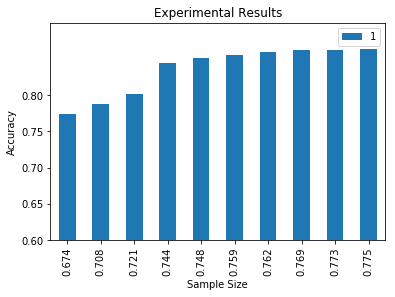

In [51]:
ax = df.plot(kind="bar",x=0,title="Experimental Results",yticks=(0.6,0.65,0.7,0.75,0.8))
# set the x-axis label
ax.set_xlabel("Sample Size")
# set the y-axis label
ax.set_ylabel("Accuracy")
# set the y axis range 
ax.set_ylim(0.6,0.9)

### Exercise 4
Can you generate a scatter plot of your results against my results?

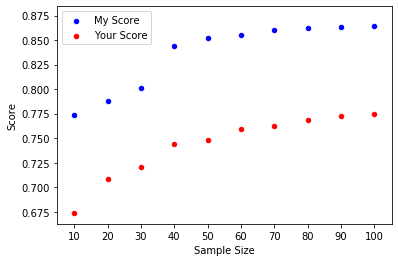

In [20]:
import matplotlib.ticker as plticker
ax = df.plot.scatter(x="Sample Size", y="My Score", color="b", label="My Score")
df.plot.scatter(x="Sample Size", y="Your Score", color="r", label="Your Score", ax=ax)
ax.set_ylabel('Score')
ax.xaxis.set_major_locator(plticker.MultipleLocator(10))

## Lazy generators (extension material)
We now introduce lazy generators, an important form of function in python. A lazy generator does not calculate its results all at once, but returns them one a a time for iteration. The `enumerate` function which we saw earlier is a lazy generator.

You can define lazy generator functions by using `yield` instead of `return`. When the function reaches a `yield` command it yields the argument and suspends execution without terminating and returns control to the level that called the function. The next time it is called it it resumes from the same place that it was left. There is no requirement to have a single yield command. You can yield in one place the first time and another place the next time.

The cell below shows a simple function using both forms so that you can see the difference. Notice that you cannot use the result in the same way. A result that is returned is passed directly as value whereas a result that is yielded must be used in an iterator.

In [54]:
def return_count_to_ten():
    return list(range(1,11))


def yield_count_to_ten():
    for i in range(1, 11):
        yield i

        
l = return_count_to_ten()
print(l)
    
i = yield_count_to_ten()
print ('yield')
print(i)


for i in yield_count_to_ten():
    print(i)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
yield
<generator object yield_count_to_ten at 0x0000026B4028EB48>
1
2
3
4
5
6
7
8
9
10


Previously, we delimited tokens by looking for spaces between them. You should have noticed that it doesn't work very well because it doesn't account for punctuation symbols. We need a better way to do this and, ideally, a separate function to do it.

Because it is hard to follow, here is a summary of the logic of the new function, `split_tokens(input_text)`:

The function reads the whole string one character at a time, adding characters to the token variable.
- When it encounters a delimiter it yields the token.
- If the token is empty it yields the delimiter character - unless it is a space - because the delimiter is an item of punctuation which is itself a token.
- After returning a token the variable is reset to an empty string.


In [56]:
def make_tokens(input_text):
    """
    Take an input text, split it into tokens, find the
    token's shape, make a feature
    vector with the token itself and its shape, return
    a list of all token feature vectors found in the input.
    :param input_text: A character string containing spaces
    :return: A list of token feature vectors (token, shape).
        Sample output: [('a', 'alpha'), ('7', 'digit'), ('A27', 'alnum')]
    """
    
    # Now it's up to the split_tokes function to decide what a token is.
    # List comprehension creates a list by extracting elements from
    # an iterable object, in this case Python automatically converts the
    # split_tokens function into an iterable object because it uses the "yield" statement:
    
    tokens = [token for token in split_tokens(input_text)]
    return map(make_token_feature_vector, tokens)


def split_tokens(input_text):
    """
    This function decides how to delimit a token. It takes an input
    string, iterates over it character by character; it collects
    constituent characters in the output token; punctuation characters
    are considered delimiters therefore become tokens of their own; the
    space character is removed from tokens. Yield each found token at
    a time.
    :param input_text: A character string containing a mix of text and delimiter characters.
    :yield A character string which is either free from delimiters or
        is a delimiter itself.
    """

    DELIMITERS = ",:!?.\n"
    token = ""
    for char in input_text:
        if char in DELIMITERS:  # test if the input character is a delimiter (substring presence)
            
            # Character strings, lists, etc, have a logical truth value in Python;
            # an empty string is False, if it has characters it is True.
            
            if not token:  # same as token == ""
                yield char
            else:
                
                # Return token to the calling program, but next time this function
                # is called, continue from
                # the next statement rather than from the beginning of the function:
                
                yield token  # After yielding control to the calling program,
                             # this function will execute the next statement:
                token = ""  # Pick up execution from here.
                yield char
        elif char == " ":
            if token:  # same as token != ""
                yield token
                token = ""
        else:
            token += char

for token in make_tokens(sample_text):
    print(token)

('This', 'alpha')
('is', 'alpha')
('some', 'alpha')
('sample', 'alpha')
('text', 'alpha')
('.', 'sentence_end')
('Feel', 'alpha')
('free', 'alpha')
('to', 'alpha')
('replace', 'alpha')
('it', 'alpha')
('with', 'alpha')
('something', 'alpha')
('more', 'alpha')
('interesting', 'alpha')
('!', 'sentence_end')
('some', 'alpha')
('some', 'alpha')


Notice how the function `split_tokens` yields the result instead of returning it. This means that it continues from the same point next time it is called.

### Exercise 5
In the empty cell below try calling the function `split_tokens` on `sample_text`. What happens?

Notice that the programme does not make a simple function call, it uses it in a list comprehension which iterates over it. Another common way to collect the yields would be with a for loop.

In [57]:
with open('sample_text.txt') as f:
    tokens = split_tokens(f.read())
    for t in tokens:
        print(t)

This
is
some
sample
text
.
Feel
free
to
replace
it
with
something
more
interesting
!
some
some


## Running a python program (extension material)
We now look at the difference between three different ways of running a python program. 

The first is the way used in the above examples: simply typing or pasting the code into a notebook (or console) and running it.

Very similar to the first way is to import the code from a file or module into a notebook (or console). If you import a module, python will automatically run it. That means it reads and executes every line in the file. If the module contains function definitions, executing them means creating the functions. If it contains code that calls functions, python will make those calls and run the functions.  

The third way is to run the module from the command line by typing python followed by the module name including the `.py` suffix.

Python behaves the same for the second and third method. However, it is often useful to have a module that runs using the third method but doesn't run using the second i.e. you can import the functions, and perhaps some variables, without running anything. To achieve this, modules often include the line  
- `if __name__ == "__main__"`  
as in the cell below. 

This will run when called from the command line, but not when the file is imported.

The cell below contains the programs for the tokens exercise. It is also stored in a file named "Exercise.py" You don't need to read the code as nothing has changed (apart from the addition of one line for testing which was added only to the saved file). 

In [58]:
def make_tokens(input_text):
    """
    Take an input text, split it into tokens, find the
    token's shape, make a feature
    vector with the token itself and its shape, return
    a list of all token feature vectors found in the input.
    :param input_text: A character string containing spaces
    :return: A list of token feature vectors (token, shape).
        Sample output: [('a', 'alpha'), ('7', 'digit'), ('A27', 'alnum')]
    """
    
    # Now it's up to the split_tokes function to decide what a token is.
    # List comprehension creates a list by extracting elements from
    # an iterable object, in this case Python automatically converts the
    # split_tokens function into an iterable object because it uses the "yield" statement:
    
    tokens = [token for token in split_tokens(input_text)]
    return map(make_token_feature_vector, tokens)


def make_token_feature_vector(token):
    
    """
    Given a token, extract its shape and return a
    vector with the token itself and its shape
    :param token: A character string
    :return: A tuple (token, shape)
    """
    
    if token.isalpha():
        return (token, "alpha")
    elif token.isdigit():
        return (token, "digit")
    elif token.isalnum():
        return (token, "alnum")
    elif token in ",:;":  
        return (token, "punctuation")
    elif token in ".!?":  
        return (token, "sentence_end")
    elif token == "\n":  
        return (token, "paragraph_end")
    else:
        return (token, "other")



def split_tokens(input_text):
    
    """
    This function decides how to delimit a token. It takes an input
    string, iterates over it character by character; it collects
    constituent characters in the output token; punctuation characters
    are considered delimiters therefore become tokens of their own; the
    space character is removed from tokens. Yield each found token at
    a time.
    :param input_text: A character string containing a mix of text and delimiter characters.
    :yield A character string which is either free from delimiters or
        is a delimiter itself.
    """
    
    # First decide what characters delimit a token:
    DELIMITERS = ",:!?.\n"
    
    token = ""
    for char in input_text:
        
        if char in DELIMITERS:  # test if the input character is a delimiter (substring presence)
            
            # Character strings, lists, etc, have a logical truth value in Python;
            # an empty string is False, if it has characters it is True.
            
            if not token:  # same as token == ""
                yield char
            else:
                
                # Return token to the calling program, but next time this function
                # is called, continue from
                # the next statement rather than from the beginning of the function:
                
                yield token  # After yielding control to the calling program,
                             # this function will execute the next statement:
                token = ""  # Pick up execution from here.
                yield char
        elif char == " ":
            if token:  # same as token != ""
                yield token
                token = ""
        else:
            token += char
            
sample_text = "This is a sample sentence01 showing 7 different token types: alphabetic, numeric, alphanumeric, Title, UPPERCASE, CamelCase and punctuation!\nSentences like that should not exist. They're too artificial.\nA REAL sentence looks different. It has flavour to it. You can smell it; it's like Pythonic code, you know?\nHave you heard of 'code smell'? Google it if you haven't."            

if __name__ == "__main__":
    for token in make_tokens(sample_text):
        print(token)

('This', 'alpha')
('is', 'alpha')
('a', 'alpha')
('sample', 'alpha')
('sentence01', 'alnum')
('showing', 'alpha')
('7', 'digit')
('different', 'alpha')
('token', 'alpha')
('types', 'alpha')
(':', 'punctuation')
('alphabetic', 'alpha')
(',', 'punctuation')
('numeric', 'alpha')
(',', 'punctuation')
('alphanumeric', 'alpha')
(',', 'punctuation')
('Title', 'alpha')
(',', 'punctuation')
('UPPERCASE', 'alpha')
(',', 'punctuation')
('CamelCase', 'alpha')
('and', 'alpha')
('punctuation', 'alpha')
('!', 'sentence_end')
('\n', 'paragraph_end')
('Sentences', 'alpha')
('like', 'alpha')
('that', 'alpha')
('should', 'alpha')
('not', 'alpha')
('exist', 'alpha')
('.', 'sentence_end')
("They're", 'other')
('too', 'alpha')
('artificial', 'alpha')
('.', 'sentence_end')
('\n', 'paragraph_end')
('A', 'alpha')
('REAL', 'alpha')
('sentence', 'alpha')
('looks', 'alpha')
('different', 'alpha')
('.', 'sentence_end')
('It', 'alpha')
('has', 'alpha')
('flavour', 'alpha')
('to', 'alpha')
('it', 'alpha')
('.', 'sen

### Exercise 6
Try the following.

1. Execute the cell above and look at what happens.

2. In the empty cell below execute:  
`import Exercise`  
Note the capital letter in the filename. 
It should not run the program. 

To understand what has happened, run each the following commands one at a time:  
`print(noone)`  
`print(Exercise.noone)`  
`from Exercise import noone`  
`print(noone)` 




In [60]:
import Exercise

In [61]:
print(noone)

NameError: name 'noone' is not defined

In [62]:
print(Exercise.noone)

expects the Spanish Inquisition


In [63]:
from Exercise import noone

In [64]:
print(noone)

expects the Spanish Inquisition


The variable `noone` did not exist in the original program (it was assigned in the test line that was added to the file).
- Notice the difference between the two types of import. Using the second type is more convenient as you don't have to specify the namespace to access functions and variables.
- For this reason people sometimes use the command  
`from module import *`  
However, this is dangerous as you can easily overwrite existing names and python will not warn you. Using the import command in this way is considered bad practice. You can sometimes get away with it when importing your own module, but avoid it with library modules.